In [1]:
import pandas as pd   #importing the libraries 
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from scipy.stats import zscore
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Importing the dataset

In [2]:
df=pd.read_csv("usecardata.csv", na_values=' ') 

In [3]:
df

Unnamed: 0                                             Brand  \
0              0     2016 BMW 3-Series320d Luxury Line [2014-2016]   
1              1                2015 Mercedes-Benz GL-Class350 CDI   
2              2                   2015 Hyundai Elite i20Magna 1.2   
3              3                 2018 Porsche Cayenne3.2 V6 Petrol   
4              4                              2011 BMW X1sDrive20d   
...          ...                                               ...   
5137         235                             2010 Hyundai i10Magna   
5138         236                        2010 Fiat LineaEmotion 1.4   
5139         237          2019 Volkswagen AmeoComfortline 1.0L (P)   
5140         238  2019 Hyundai Elite i20Magna Plus 1.2 [2019-2020]   
5141         239                      2021 Maruti Suzuki ErtigaVXi   

                             Model      Year        Fuel Type  \
0     320d Luxury Line [2014-2016]  Jul 2016           Diesel   
1                          350 CDI  Aug 2015           Diesel   
2                        Magna 1.2  Jan 2015           Petrol   
3                    3.2 V6 Petrol  Nov 2018           Petrol   
4                        sDrive20d  Jun 2011           Diesel   
...                            ...       ...              ...   
5137                         Magna  Nov 2010  Petrol + Petrol   
5138                   Emotion 1.4  Jan 2010  Petrol + Petrol   
5139          Comfortline 1.0L (P)  Mar 2019  Petrol + Petrol   
5140    Magna Plus 1.2 [2019-2020]  Oct 2019  Petrol + Petrol   
5141                           VXi  Jun 2021  Petrol + Petrol   

                                               Location   Kilometers  \
0              Nit, Faridabad Car Location is Faridabad    65,000 km   
1              Nit, Faridabad Car Location is Faridabad    80,000 km   
2                                        Rajapur, Delhi    77,456 km   
3     Mathura Rd.Faridabad, Faridabad Car Location i...    19,000 km   
4         Indira Nagar, Lucknow Car Location is Lucknow  1,16,000 km   
...                                                 ...          ...   
5137                           Nagpur Momimpura, Nagpur    86,000 km   
5138                           Nagpur Gokulpeth, Nagpur    65,000 km   
5139                                  Bagadgani, Nagpur    16,000 km   
5140                               Kamptee Camp, Nagpur    21,000 km   
5141                                             Nagpur     4,000 km   

         Owners               Color         Price  
0         First               White  ₹ 22.99 Lakh  
1        Second               Black  ₹ 32.99 Lakh  
2         First              Silver    ₹ 4.5 Lakh  
3         First              Maroon  ₹ 1.21 Crore  
4         First              Silver   ₹ 9.75 Lakh  
...         ...                 ...           ...  
5137  4 or More      Champagne Gold    ₹ 1.9 Lakh  
5138     Second        Flamenco Red    ₹ 2.2 Lakh  
5139      First        Toffee Brown    ₹ 6.5 Lakh  
5140      First               White    ₹ 7.1 Lakh  
5141      First  Pearl Arctic White    ₹ 9.7 Lakh  

[5142 rows x 10 columns]

The above dataset, we have gathered the information of above dataset from one of the most leading site called www.carwale.com which is one the major seller of used cars. It has listed the various numbers of used cars by the sellers at different locations. The above dataset is created using the web scrapping tools called selenium and beautiful soup. We have gathered information like the brand name, model, year owners price and color of the cars using web scarpping and we will be predicting the price of the used car on the basis of the the various information gathered.

We have collected the data of the various cars at aprox 15 different locations. As the information gathered form the site is in very raw form we will be perfroming feature engineering and data cleaning to extract the information. We are supposed to predict the price of the cars which makes it a regression problem that means performing various regression algorithms in predicting the price of the car.

We do have some of the missing values in the columns. We will performing feature engineering to extract the information from the various columns which makes easy for the model. price is the dependent column and others columns are the independent ones.

In [4]:
df.columns #names of the columns

Index(['Unnamed: 0', 'Brand', 'Model', 'Year', 'Fuel Type', 'Location',
       'Kilometers', 'Owners', 'Color', 'Price'],
      dtype='object')

In [5]:
df.dtypes  #data tyoes of each columns

Unnamed: 0     int64
Brand         object
Model         object
Year          object
Fuel Type     object
Location      object
Kilometers    object
Owners        object
Color         object
Price         object
dtype: object

In [6]:
df.info() #information of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5142 entries, 0 to 5141
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5142 non-null   int64 
 1   Brand       5142 non-null   object
 2   Model       5142 non-null   object
 3   Year        5142 non-null   object
 4   Fuel Type   5142 non-null   object
 5   Location    5142 non-null   object
 6   Kilometers  5142 non-null   object
 7   Owners      5142 non-null   object
 8   Color       5142 non-null   object
 9   Price       5142 non-null   object
dtypes: int64(1), object(9)
memory usage: 401.8+ KB


In [7]:
df.isnull().sum()  #checking the null values in each column

Unnamed: 0    0
Brand         0
Model         0
Year          0
Fuel Type     0
Location      0
Kilometers    0
Owners        0
Color         0
Price         0
dtype: int64

Here we could see that no null value is there in the columns we will be checking this null values again after performing feature engineering and converting the data types of each columns as per the reqiurement.

# Data Cleaning/ Preprocessing

In [8]:
df.drop('Unnamed: 0',axis=1,inplace=True) #droping unnamed column which has no use for us.

In [9]:
df['sym'],df['price (in lakhs)'],df['unit'] = df['Price'].str.split(' ',3).str
df.drop('Price',axis=1,inplace=True)  #spliting the price column into 3 columns as we n=need only the numerical value

In [10]:
df

Brand  \
0        2016 BMW 3-Series320d Luxury Line [2014-2016]   
1                   2015 Mercedes-Benz GL-Class350 CDI   
2                      2015 Hyundai Elite i20Magna 1.2   
3                    2018 Porsche Cayenne3.2 V6 Petrol   
4                                 2011 BMW X1sDrive20d   
...                                                ...   
5137                             2010 Hyundai i10Magna   
5138                        2010 Fiat LineaEmotion 1.4   
5139          2019 Volkswagen AmeoComfortline 1.0L (P)   
5140  2019 Hyundai Elite i20Magna Plus 1.2 [2019-2020]   
5141                      2021 Maruti Suzuki ErtigaVXi   

                             Model      Year        Fuel Type  \
0     320d Luxury Line [2014-2016]  Jul 2016           Diesel   
1                          350 CDI  Aug 2015           Diesel   
2                        Magna 1.2  Jan 2015           Petrol   
3                    3.2 V6 Petrol  Nov 2018           Petrol   
4                        sDrive20d  Jun 2011           Diesel   
...                            ...       ...              ...   
5137                         Magna  Nov 2010  Petrol + Petrol   
5138                   Emotion 1.4  Jan 2010  Petrol + Petrol   
5139          Comfortline 1.0L (P)  Mar 2019  Petrol + Petrol   
5140    Magna Plus 1.2 [2019-2020]  Oct 2019  Petrol + Petrol   
5141                           VXi  Jun 2021  Petrol + Petrol   

                                               Location   Kilometers  \
0              Nit, Faridabad Car Location is Faridabad    65,000 km   
1              Nit, Faridabad Car Location is Faridabad    80,000 km   
2                                        Rajapur, Delhi    77,456 km   
3     Mathura Rd.Faridabad, Faridabad Car Location i...    19,000 km   
4         Indira Nagar, Lucknow Car Location is Lucknow  1,16,000 km   
...                                                 ...          ...   
5137                           Nagpur Momimpura, Nagpur    86,000 km   
5138                           Nagpur Gokulpeth, Nagpur    65,000 km   
5139                                  Bagadgani, Nagpur    16,000 km   
5140                               Kamptee Camp, Nagpur    21,000 km   
5141                                             Nagpur     4,000 km   

         Owners               Color sym price (in lakhs)   unit  
0         First               White   ₹            22.99   Lakh  
1        Second               Black   ₹            32.99   Lakh  
2         First              Silver   ₹              4.5   Lakh  
3         First              Maroon   ₹             1.21  Crore  
4         First              Silver   ₹             9.75   Lakh  
...         ...                 ...  ..              ...    ...  
5137  4 or More      Champagne Gold   ₹              1.9   Lakh  
5138     Second        Flamenco Red   ₹              2.2   Lakh  
5139      First        Toffee Brown   ₹              6.5   Lakh  
5140      First               White   ₹              7.1   Lakh  
5141      First  Pearl Arctic White   ₹              9.7   Lakh  

[5142 rows x 11 columns]

In [11]:
df.drop('sym',axis=1,inplace=True)  #droping the unwanted column

In [12]:
df.drop('unit',axis=1,inplace=True)

In [13]:
df

Brand  \
0        2016 BMW 3-Series320d Luxury Line [2014-2016]   
1                   2015 Mercedes-Benz GL-Class350 CDI   
2                      2015 Hyundai Elite i20Magna 1.2   
3                    2018 Porsche Cayenne3.2 V6 Petrol   
4                                 2011 BMW X1sDrive20d   
...                                                ...   
5137                             2010 Hyundai i10Magna   
5138                        2010 Fiat LineaEmotion 1.4   
5139          2019 Volkswagen AmeoComfortline 1.0L (P)   
5140  2019 Hyundai Elite i20Magna Plus 1.2 [2019-2020]   
5141                      2021 Maruti Suzuki ErtigaVXi   

                             Model      Year        Fuel Type  \
0     320d Luxury Line [2014-2016]  Jul 2016           Diesel   
1                          350 CDI  Aug 2015           Diesel   
2                        Magna 1.2  Jan 2015           Petrol   
3                    3.2 V6 Petrol  Nov 2018           Petrol   
4                        sDrive20d  Jun 2011           Diesel   
...                            ...       ...              ...   
5137                         Magna  Nov 2010  Petrol + Petrol   
5138                   Emotion 1.4  Jan 2010  Petrol + Petrol   
5139          Comfortline 1.0L (P)  Mar 2019  Petrol + Petrol   
5140    Magna Plus 1.2 [2019-2020]  Oct 2019  Petrol + Petrol   
5141                           VXi  Jun 2021  Petrol + Petrol   

                                               Location   Kilometers  \
0              Nit, Faridabad Car Location is Faridabad    65,000 km   
1              Nit, Faridabad Car Location is Faridabad    80,000 km   
2                                        Rajapur, Delhi    77,456 km   
3     Mathura Rd.Faridabad, Faridabad Car Location i...    19,000 km   
4         Indira Nagar, Lucknow Car Location is Lucknow  1,16,000 km   
...                                                 ...          ...   
5137                           Nagpur Momimpura, Nagpur    86,000 km   
5138                           Nagpur Gokulpeth, Nagpur    65,000 km   
5139                                  Bagadgani, Nagpur    16,000 km   
5140                               Kamptee Camp, Nagpur    21,000 km   
5141                                             Nagpur     4,000 km   

         Owners               Color price (in lakhs)  
0         First               White            22.99  
1        Second               Black            32.99  
2         First              Silver              4.5  
3         First              Maroon             1.21  
4         First              Silver             9.75  
...         ...                 ...              ...  
5137  4 or More      Champagne Gold              1.9  
5138     Second        Flamenco Red              2.2  
5139      First        Toffee Brown              6.5  
5140      First               White              7.1  
5141      First  Pearl Arctic White              9.7  

[5142 rows x 9 columns]

In [14]:
df['Name'] = df['Brand'].str.split(' ').str[1] 
#extracting the name of the brand from brand column as all other information is irrelevant for us.

In [15]:
df

Brand  \
0        2016 BMW 3-Series320d Luxury Line [2014-2016]   
1                   2015 Mercedes-Benz GL-Class350 CDI   
2                      2015 Hyundai Elite i20Magna 1.2   
3                    2018 Porsche Cayenne3.2 V6 Petrol   
4                                 2011 BMW X1sDrive20d   
...                                                ...   
5137                             2010 Hyundai i10Magna   
5138                        2010 Fiat LineaEmotion 1.4   
5139          2019 Volkswagen AmeoComfortline 1.0L (P)   
5140  2019 Hyundai Elite i20Magna Plus 1.2 [2019-2020]   
5141                      2021 Maruti Suzuki ErtigaVXi   

                             Model      Year        Fuel Type  \
0     320d Luxury Line [2014-2016]  Jul 2016           Diesel   
1                          350 CDI  Aug 2015           Diesel   
2                        Magna 1.2  Jan 2015           Petrol   
3                    3.2 V6 Petrol  Nov 2018           Petrol   
4                        sDrive20d  Jun 2011           Diesel   
...                            ...       ...              ...   
5137                         Magna  Nov 2010  Petrol + Petrol   
5138                   Emotion 1.4  Jan 2010  Petrol + Petrol   
5139          Comfortline 1.0L (P)  Mar 2019  Petrol + Petrol   
5140    Magna Plus 1.2 [2019-2020]  Oct 2019  Petrol + Petrol   
5141                           VXi  Jun 2021  Petrol + Petrol   

                                               Location   Kilometers  \
0              Nit, Faridabad Car Location is Faridabad    65,000 km   
1              Nit, Faridabad Car Location is Faridabad    80,000 km   
2                                        Rajapur, Delhi    77,456 km   
3     Mathura Rd.Faridabad, Faridabad Car Location i...    19,000 km   
4         Indira Nagar, Lucknow Car Location is Lucknow  1,16,000 km   
...                                                 ...          ...   
5137                           Nagpur Momimpura, Nagpur    86,000 km   
5138                           Nagpur Gokulpeth, Nagpur    65,000 km   
5139                                  Bagadgani, Nagpur    16,000 km   
5140                               Kamptee Camp, Nagpur    21,000 km   
5141                                             Nagpur     4,000 km   

         Owners               Color price (in lakhs)           Name  
0         First               White            22.99            BMW  
1        Second               Black            32.99  Mercedes-Benz  
2         First              Silver              4.5        Hyundai  
3         First              Maroon             1.21        Porsche  
4         First              Silver             9.75            BMW  
...         ...                 ...              ...            ...  
5137  4 or More      Champagne Gold              1.9        Hyundai  
5138     Second        Flamenco Red              2.2           Fiat  
5139      First        Toffee Brown              6.5     Volkswagen  
5140      First               White              7.1        Hyundai  
5141      First  Pearl Arctic White              9.7         Maruti  

[5142 rows x 10 columns]

In [16]:
df['kilometers'],df['units'] = df['Kilometers'].str.split(' ',2).str
df.drop('Kilometers',axis=1,inplace=True) #spliting the kilometers column from the column as we need only numerical value.

In [17]:
df

Brand  \
0        2016 BMW 3-Series320d Luxury Line [2014-2016]   
1                   2015 Mercedes-Benz GL-Class350 CDI   
2                      2015 Hyundai Elite i20Magna 1.2   
3                    2018 Porsche Cayenne3.2 V6 Petrol   
4                                 2011 BMW X1sDrive20d   
...                                                ...   
5137                             2010 Hyundai i10Magna   
5138                        2010 Fiat LineaEmotion 1.4   
5139          2019 Volkswagen AmeoComfortline 1.0L (P)   
5140  2019 Hyundai Elite i20Magna Plus 1.2 [2019-2020]   
5141                      2021 Maruti Suzuki ErtigaVXi   

                             Model      Year        Fuel Type  \
0     320d Luxury Line [2014-2016]  Jul 2016           Diesel   
1                          350 CDI  Aug 2015           Diesel   
2                        Magna 1.2  Jan 2015           Petrol   
3                    3.2 V6 Petrol  Nov 2018           Petrol   
4                        sDrive20d  Jun 2011           Diesel   
...                            ...       ...              ...   
5137                         Magna  Nov 2010  Petrol + Petrol   
5138                   Emotion 1.4  Jan 2010  Petrol + Petrol   
5139          Comfortline 1.0L (P)  Mar 2019  Petrol + Petrol   
5140    Magna Plus 1.2 [2019-2020]  Oct 2019  Petrol + Petrol   
5141                           VXi  Jun 2021  Petrol + Petrol   

                                               Location     Owners  \
0              Nit, Faridabad Car Location is Faridabad      First   
1              Nit, Faridabad Car Location is Faridabad     Second   
2                                        Rajapur, Delhi      First   
3     Mathura Rd.Faridabad, Faridabad Car Location i...      First   
4         Indira Nagar, Lucknow Car Location is Lucknow      First   
...                                                 ...        ...   
5137                           Nagpur Momimpura, Nagpur  4 or More   
5138                           Nagpur Gokulpeth, Nagpur     Second   
5139                                  Bagadgani, Nagpur      First   
5140                               Kamptee Camp, Nagpur      First   
5141                                             Nagpur      First   

                   Color price (in lakhs)           Name kilometers units  
0                  White            22.99            BMW     65,000    km  
1                  Black            32.99  Mercedes-Benz     80,000    km  
2                 Silver              4.5        Hyundai     77,456    km  
3                 Maroon             1.21        Porsche     19,000    km  
4                 Silver             9.75            BMW   1,16,000    km  
...                  ...              ...            ...        ...   ...  
5137      Champagne Gold              1.9        Hyundai     86,000    km  
5138        Flamenco Red              2.2           Fiat     65,000    km  
5139        Toffee Brown              6.5     Volkswagen     16,000    km  
5140               White              7.1        Hyundai     21,000    km  
5141  Pearl Arctic White              9.7         Maruti      4,000    km  

[5142 rows x 11 columns]

In [18]:
df.drop('units',axis=1,inplace=True) #droping the units column as we have extracted the numerical value from kilometers

In [19]:
df

Brand  \
0        2016 BMW 3-Series320d Luxury Line [2014-2016]   
1                   2015 Mercedes-Benz GL-Class350 CDI   
2                      2015 Hyundai Elite i20Magna 1.2   
3                    2018 Porsche Cayenne3.2 V6 Petrol   
4                                 2011 BMW X1sDrive20d   
...                                                ...   
5137                             2010 Hyundai i10Magna   
5138                        2010 Fiat LineaEmotion 1.4   
5139          2019 Volkswagen AmeoComfortline 1.0L (P)   
5140  2019 Hyundai Elite i20Magna Plus 1.2 [2019-2020]   
5141                      2021 Maruti Suzuki ErtigaVXi   

                             Model      Year        Fuel Type  \
0     320d Luxury Line [2014-2016]  Jul 2016           Diesel   
1                          350 CDI  Aug 2015           Diesel   
2                        Magna 1.2  Jan 2015           Petrol   
3                    3.2 V6 Petrol  Nov 2018           Petrol   
4                        sDrive20d  Jun 2011           Diesel   
...                            ...       ...              ...   
5137                         Magna  Nov 2010  Petrol + Petrol   
5138                   Emotion 1.4  Jan 2010  Petrol + Petrol   
5139          Comfortline 1.0L (P)  Mar 2019  Petrol + Petrol   
5140    Magna Plus 1.2 [2019-2020]  Oct 2019  Petrol + Petrol   
5141                           VXi  Jun 2021  Petrol + Petrol   

                                               Location     Owners  \
0              Nit, Faridabad Car Location is Faridabad      First   
1              Nit, Faridabad Car Location is Faridabad     Second   
2                                        Rajapur, Delhi      First   
3     Mathura Rd.Faridabad, Faridabad Car Location i...      First   
4         Indira Nagar, Lucknow Car Location is Lucknow      First   
...                                                 ...        ...   
5137                           Nagpur Momimpura, Nagpur  4 or More   
5138                           Nagpur Gokulpeth, Nagpur     Second   
5139                                  Bagadgani, Nagpur      First   
5140                               Kamptee Camp, Nagpur      First   
5141                                             Nagpur      First   

                   Color price (in lakhs)           Name kilometers  
0                  White            22.99            BMW     65,000  
1                  Black            32.99  Mercedes-Benz     80,000  
2                 Silver              4.5        Hyundai     77,456  
3                 Maroon             1.21        Porsche     19,000  
4                 Silver             9.75            BMW   1,16,000  
...                  ...              ...            ...        ...  
5137      Champagne Gold              1.9        Hyundai     86,000  
5138        Flamenco Red              2.2           Fiat     65,000  
5139        Toffee Brown              6.5     Volkswagen     16,000  
5140               White              7.1        Hyundai     21,000  
5141  Pearl Arctic White              9.7         Maruti      4,000  

[5142 rows x 10 columns]

In [20]:
 df.drop('Brand',axis=1,inplace=True) #as we have extracted the name from the brand we will drop the brnd column.

In [21]:
df

Model      Year        Fuel Type  \
0     320d Luxury Line [2014-2016]  Jul 2016           Diesel   
1                          350 CDI  Aug 2015           Diesel   
2                        Magna 1.2  Jan 2015           Petrol   
3                    3.2 V6 Petrol  Nov 2018           Petrol   
4                        sDrive20d  Jun 2011           Diesel   
...                            ...       ...              ...   
5137                         Magna  Nov 2010  Petrol + Petrol   
5138                   Emotion 1.4  Jan 2010  Petrol + Petrol   
5139          Comfortline 1.0L (P)  Mar 2019  Petrol + Petrol   
5140    Magna Plus 1.2 [2019-2020]  Oct 2019  Petrol + Petrol   
5141                           VXi  Jun 2021  Petrol + Petrol   

                                               Location     Owners  \
0              Nit, Faridabad Car Location is Faridabad      First   
1              Nit, Faridabad Car Location is Faridabad     Second   
2                                        Rajapur, Delhi      First   
3     Mathura Rd.Faridabad, Faridabad Car Location i...      First   
4         Indira Nagar, Lucknow Car Location is Lucknow      First   
...                                                 ...        ...   
5137                           Nagpur Momimpura, Nagpur  4 or More   
5138                           Nagpur Gokulpeth, Nagpur     Second   
5139                                  Bagadgani, Nagpur      First   
5140                               Kamptee Camp, Nagpur      First   
5141                                             Nagpur      First   

                   Color price (in lakhs)           Name kilometers  
0                  White            22.99            BMW     65,000  
1                  Black            32.99  Mercedes-Benz     80,000  
2                 Silver              4.5        Hyundai     77,456  
3                 Maroon             1.21        Porsche     19,000  
4                 Silver             9.75            BMW   1,16,000  
...                  ...              ...            ...        ...  
5137      Champagne Gold              1.9        Hyundai     86,000  
5138        Flamenco Red              2.2           Fiat     65,000  
5139        Toffee Brown              6.5     Volkswagen     16,000  
5140               White              7.1        Hyundai     21,000  
5141  Pearl Arctic White              9.7         Maruti      4,000  

[5142 rows x 9 columns]

In [22]:
df['year'] = df['Year'].str.split(' ').str[-1] #from year column we will be extracting the year of the model.

In [23]:
df

Model      Year        Fuel Type  \
0     320d Luxury Line [2014-2016]  Jul 2016           Diesel   
1                          350 CDI  Aug 2015           Diesel   
2                        Magna 1.2  Jan 2015           Petrol   
3                    3.2 V6 Petrol  Nov 2018           Petrol   
4                        sDrive20d  Jun 2011           Diesel   
...                            ...       ...              ...   
5137                         Magna  Nov 2010  Petrol + Petrol   
5138                   Emotion 1.4  Jan 2010  Petrol + Petrol   
5139          Comfortline 1.0L (P)  Mar 2019  Petrol + Petrol   
5140    Magna Plus 1.2 [2019-2020]  Oct 2019  Petrol + Petrol   
5141                           VXi  Jun 2021  Petrol + Petrol   

                                               Location     Owners  \
0              Nit, Faridabad Car Location is Faridabad      First   
1              Nit, Faridabad Car Location is Faridabad     Second   
2                                        Rajapur, Delhi      First   
3     Mathura Rd.Faridabad, Faridabad Car Location i...      First   
4         Indira Nagar, Lucknow Car Location is Lucknow      First   
...                                                 ...        ...   
5137                           Nagpur Momimpura, Nagpur  4 or More   
5138                           Nagpur Gokulpeth, Nagpur     Second   
5139                                  Bagadgani, Nagpur      First   
5140                               Kamptee Camp, Nagpur      First   
5141                                             Nagpur      First   

                   Color price (in lakhs)           Name kilometers  year  
0                  White            22.99            BMW     65,000  2016  
1                  Black            32.99  Mercedes-Benz     80,000  2015  
2                 Silver              4.5        Hyundai     77,456  2015  
3                 Maroon             1.21        Porsche     19,000  2018  
4                 Silver             9.75            BMW   1,16,000  2011  
...                  ...              ...            ...        ...   ...  
5137      Champagne Gold              1.9        Hyundai     86,000  2010  
5138        Flamenco Red              2.2           Fiat     65,000  2010  
5139        Toffee Brown              6.5     Volkswagen     16,000  2019  
5140               White              7.1        Hyundai     21,000  2019  
5141  Pearl Arctic White              9.7         Maruti      4,000  2021  

[5142 rows x 10 columns]

In [24]:
df.drop('Year',axis=1,inplace=True) #as we extracted the relevant information we will drop the year column.

In [25]:
df['location'] = df['Location'].str.split(' ').str[-1] #we will extracting only the name of the city

In [26]:
df.drop('Location',axis=1,inplace=True) #we have droped the location column.

In [27]:
df

Model        Fuel Type     Owners  \
0     320d Luxury Line [2014-2016]           Diesel      First   
1                          350 CDI           Diesel     Second   
2                        Magna 1.2           Petrol      First   
3                    3.2 V6 Petrol           Petrol      First   
4                        sDrive20d           Diesel      First   
...                            ...              ...        ...   
5137                         Magna  Petrol + Petrol  4 or More   
5138                   Emotion 1.4  Petrol + Petrol     Second   
5139          Comfortline 1.0L (P)  Petrol + Petrol      First   
5140    Magna Plus 1.2 [2019-2020]  Petrol + Petrol      First   
5141                           VXi  Petrol + Petrol      First   

                   Color price (in lakhs)           Name kilometers  year  \
0                  White            22.99            BMW     65,000  2016   
1                  Black            32.99  Mercedes-Benz     80,000  2015   
2                 Silver              4.5        Hyundai     77,456  2015   
3                 Maroon             1.21        Porsche     19,000  2018   
4                 Silver             9.75            BMW   1,16,000  2011   
...                  ...              ...            ...        ...   ...   
5137      Champagne Gold              1.9        Hyundai     86,000  2010   
5138        Flamenco Red              2.2           Fiat     65,000  2010   
5139        Toffee Brown              6.5     Volkswagen     16,000  2019   
5140               White              7.1        Hyundai     21,000  2019   
5141  Pearl Arctic White              9.7         Maruti      4,000  2021   

       location  
0     Faridabad  
1     Faridabad  
2         Delhi  
3     Faridabad  
4       Lucknow  
...         ...  
5137     Nagpur  
5138     Nagpur  
5139     Nagpur  
5140     Nagpur  
5141     Nagpur  

[5142 rows x 9 columns]

In [28]:
df.isnull().sum() #we can see that we have null values in the columns

Model                0
Fuel Type            0
Owners               0
Color                0
price (in lakhs)    13
Name                13
kilometers           0
year                 0
location             0
dtype: int64

In [29]:
df.dropna(inplace=True) #we will be droping the null values.

In [30]:
df

Model        Fuel Type     Owners  \
0     320d Luxury Line [2014-2016]           Diesel      First   
1                          350 CDI           Diesel     Second   
2                        Magna 1.2           Petrol      First   
3                    3.2 V6 Petrol           Petrol      First   
4                        sDrive20d           Diesel      First   
...                            ...              ...        ...   
5137                         Magna  Petrol + Petrol  4 or More   
5138                   Emotion 1.4  Petrol + Petrol     Second   
5139          Comfortline 1.0L (P)  Petrol + Petrol      First   
5140    Magna Plus 1.2 [2019-2020]  Petrol + Petrol      First   
5141                           VXi  Petrol + Petrol      First   

                   Color price (in lakhs)           Name kilometers  year  \
0                  White            22.99            BMW     65,000  2016   
1                  Black            32.99  Mercedes-Benz     80,000  2015   
2                 Silver              4.5        Hyundai     77,456  2015   
3                 Maroon             1.21        Porsche     19,000  2018   
4                 Silver             9.75            BMW   1,16,000  2011   
...                  ...              ...            ...        ...   ...   
5137      Champagne Gold              1.9        Hyundai     86,000  2010   
5138        Flamenco Red              2.2           Fiat     65,000  2010   
5139        Toffee Brown              6.5     Volkswagen     16,000  2019   
5140               White              7.1        Hyundai     21,000  2019   
5141  Pearl Arctic White              9.7         Maruti      4,000  2021   

       location  
0     Faridabad  
1     Faridabad  
2         Delhi  
3     Faridabad  
4       Lucknow  
...         ...  
5137     Nagpur  
5138     Nagpur  
5139     Nagpur  
5140     Nagpur  
5141     Nagpur  

[5129 rows x 9 columns]

In [31]:
df['price (in lakhs)'] = pd.to_numeric(df['price (in lakhs)'], errors='coerce') 
#coverting the data type of price column to numeric form.

In [32]:
df['year'] = pd.to_numeric(df['year'], errors='coerce')
#coverting the data type of year to numeric form

In [33]:
df.kilometers = df.kilometers.str.replace(',', '').astype(int)
#converting the data type of kilometers of numeric form.

In [34]:
df.dtypes

Model                object
Fuel Type            object
Owners               object
Color                object
price (in lakhs)    float64
Name                 object
kilometers            int32
year                  int64
location             object
dtype: object

In [35]:
df=df[['Name','Model','year','Fuel Type','location','Owners','kilometers','Color','price (in lakhs)']]
#aligning the various features

In [36]:
df

Name                         Model  year        Fuel Type  \
0               BMW  320d Luxury Line [2014-2016]  2016           Diesel   
1     Mercedes-Benz                       350 CDI  2015           Diesel   
2           Hyundai                     Magna 1.2  2015           Petrol   
3           Porsche                 3.2 V6 Petrol  2018           Petrol   
4               BMW                     sDrive20d  2011           Diesel   
...             ...                           ...   ...              ...   
5137        Hyundai                         Magna  2010  Petrol + Petrol   
5138           Fiat                   Emotion 1.4  2010  Petrol + Petrol   
5139     Volkswagen          Comfortline 1.0L (P)  2019  Petrol + Petrol   
5140        Hyundai    Magna Plus 1.2 [2019-2020]  2019  Petrol + Petrol   
5141         Maruti                           VXi  2021  Petrol + Petrol   

       location     Owners  kilometers               Color  price (in lakhs)  
0     Faridabad      First       65000               White             22.99  
1     Faridabad     Second       80000               Black             32.99  
2         Delhi      First       77456              Silver              4.50  
3     Faridabad      First       19000              Maroon              1.21  
4       Lucknow      First      116000              Silver              9.75  
...         ...        ...         ...                 ...               ...  
5137     Nagpur  4 or More       86000      Champagne Gold              1.90  
5138     Nagpur     Second       65000        Flamenco Red              2.20  
5139     Nagpur      First       16000        Toffee Brown              6.50  
5140     Nagpur      First       21000               White              7.10  
5141     Nagpur      First        4000  Pearl Arctic White              9.70  

[5129 rows x 9 columns]

In [39]:
df.isnull().sum() #checking the null values again

Name                 0
Model                0
year                 0
Fuel Type            0
location             0
Owners               0
kilometers           0
Color                0
price (in lakhs)    50
dtype: int64

In [40]:
df.dropna(inplace=True) #droping the null values

In [41]:
df

Name                         Model  year        Fuel Type  \
0               BMW  320d Luxury Line [2014-2016]  2016           Diesel   
1     Mercedes-Benz                       350 CDI  2015           Diesel   
2           Hyundai                     Magna 1.2  2015           Petrol   
3           Porsche                 3.2 V6 Petrol  2018           Petrol   
4               BMW                     sDrive20d  2011           Diesel   
...             ...                           ...   ...              ...   
5137        Hyundai                         Magna  2010  Petrol + Petrol   
5138           Fiat                   Emotion 1.4  2010  Petrol + Petrol   
5139     Volkswagen          Comfortline 1.0L (P)  2019  Petrol + Petrol   
5140        Hyundai    Magna Plus 1.2 [2019-2020]  2019  Petrol + Petrol   
5141         Maruti                           VXi  2021  Petrol + Petrol   

       location     Owners  kilometers               Color  price (in lakhs)  
0     Faridabad      First       65000               White             22.99  
1     Faridabad     Second       80000               Black             32.99  
2         Delhi      First       77456              Silver              4.50  
3     Faridabad      First       19000              Maroon              1.21  
4       Lucknow      First      116000              Silver              9.75  
...         ...        ...         ...                 ...               ...  
5137     Nagpur  4 or More       86000      Champagne Gold              1.90  
5138     Nagpur     Second       65000        Flamenco Red              2.20  
5139     Nagpur      First       16000        Toffee Brown              6.50  
5140     Nagpur      First       21000               White              7.10  
5141     Nagpur      First        4000  Pearl Arctic White              9.70  

[5079 rows x 9 columns]

This is how the data set looks like after perfroming the feature engineering and droping the relevant information. On this dataset will be doing the univaraiant, bivariant and Multivariant Analysis.

In [42]:
df.to_csv("usecardataforploting.csv")

In [44]:
df.drop('Model',axis=1,inplace=True) #droping the model column as it is not contributing in predicting the price of the car.

In [45]:
df

Name  year        Fuel Type   location     Owners  kilometers  \
0               BMW  2016           Diesel  Faridabad      First       65000   
1     Mercedes-Benz  2015           Diesel  Faridabad     Second       80000   
2           Hyundai  2015           Petrol      Delhi      First       77456   
3           Porsche  2018           Petrol  Faridabad      First       19000   
4               BMW  2011           Diesel    Lucknow      First      116000   
...             ...   ...              ...        ...        ...         ...   
5137        Hyundai  2010  Petrol + Petrol     Nagpur  4 or More       86000   
5138           Fiat  2010  Petrol + Petrol     Nagpur     Second       65000   
5139     Volkswagen  2019  Petrol + Petrol     Nagpur      First       16000   
5140        Hyundai  2019  Petrol + Petrol     Nagpur      First       21000   
5141         Maruti  2021  Petrol + Petrol     Nagpur      First        4000   

                   Color  price (in lakhs)  
0                  White             22.99  
1                  Black             32.99  
2                 Silver              4.50  
3                 Maroon              1.21  
4                 Silver              9.75  
...                  ...               ...  
5137      Champagne Gold              1.90  
5138        Flamenco Red              2.20  
5139        Toffee Brown              6.50  
5140               White              7.10  
5141  Pearl Arctic White              9.70  

[5079 rows x 8 columns]

In [46]:
df['location'].value_counts()  #calculating the unique values

Hyderabad        399
Lucknow          395
Kanpur           352
Pune             250
Chennai          248
Ahmedabad        247
Bangalore        246
Jaipur           245
Kolkata          244
Coimbatore       244
Indore           241
Nagpur           232
Ranchi           232
Chandigarh       230
Delhi            204
Mumbai           201
Mohali           189
Varanasi         145
Jammu            135
Visakhapatnam     81
Ludhiana          60
Karnal            53
Thane             46
Faridabad         45
Agra              33
Allahabad         31
Mathura           14
Noida             13
Jalandhar         11
Zirakpur           8
Panchkula          5
Name: location, dtype: int64

In [47]:
df['Name'].value_counts() #unique values in the name column

Maruti              1272
Hyundai              857
Honda                395
Toyota               325
Mahindra             273
Mercedes-Benz        269
Audi                 252
Ford                 218
BMW                  202
Volkswagen           183
Tata                 144
Skoda                114
Renault              113
Chevrolet             54
Nissan                53
Jaguar                49
Volvo                 44
Porsche               38
Kia                   37
Jeep                  35
Land                  34
Datsun                22
Fiat                  20
MG                    20
Mitsubishi            16
MINI                  15
Lamborghini            5
Mahindra-Renault       3
Lexus                  3
Ssangyong              3
Isuzu                  3
Hindustan              2
Willys                 1
Rolls-Royce            1
Bentley                1
Maserati               1
Cadillac               1
DC                     1
Name: Name, dtype: int64

In [48]:
df['Owners'].value_counts() #unique values in owners column.

First               3965
Second               938
Third                143
Fourth                14
4 or More             10
UnRegistered Car       9
Name: Owners, dtype: int64

In [49]:
df['Fuel Type'].value_counts()  #unique values in fuel type column

Diesel              2631
Petrol              2063
Petrol + Petrol      155
Diesel + Diesel      125
Petrol + Cng          42
CNG + Cng             26
LPG + Lpg             13
LPG + Petrol+Lpg       7
Petrol + Lpg           4
Petrol + CNG           3
Electric               2
Petrol + Diesel        2
Petrol + LPG           2
Hybrid                 2
CNG + Petrol+Cng       1
Diesel + Petrol        1
Name: Fuel Type, dtype: int64

In [50]:
df['Color'].value_counts()   #unique values in color column.

White                               1865
Silver                               705
Grey                                 555
Red                                  357
Black                                355
                                    ... 
Platinum Metallic                      1
Alabaster Silver                       1
Platinum Silver                        1
Fire Brick Red                         1
White Orchid Pearl, Beach Colour       1
Name: Color, Length: 148, dtype: int64

# Label Encoding

In [51]:
le=LabelEncoder()   #converting the categorial data into numerical data

name=["Name","Fuel Type","location","Owners",'Color']
for val in name:
    df[val]=le.fit_transform(df[val].astype(str))

In [52]:
df

Name  year  Fuel Type  location  Owners  kilometers  Color  \
0        1  2016          2         8       1       65000    141   
1       25  2015          2         8       3       80000     11   
2       11  2015          9         7       1       77456    118   
3       28  2018          9         8       1       19000     60   
4        1  2011          2        17       1      116000    118   
...    ...   ...        ...       ...     ...         ...    ...   
5137    11  2010         15        22       0       86000     25   
5138     7  2010         15        22       3       65000     42   
5139    35  2019         15        22       1       16000    132   
5140    11  2019         15        22       1       21000    141   
5141    23  2021         15        22       1        4000     86   

      price (in lakhs)  
0                22.99  
1                32.99  
2                 4.50  
3                 1.21  
4                 9.75  
...                ...  
5137              1.90  
5138              2.20  
5139              6.50  
5140              7.10  
5141              9.70  

[5079 rows x 8 columns]

In [53]:
df.describe()

Name         year    Fuel Type     location       Owners  \
count  5079.000000  5079.000000  5079.000000  5079.000000  5079.000000   
mean     18.592046  2014.742666     5.375271    13.472534     1.461705   
std      10.120160     3.452846     3.840374     8.020208     0.901216   
min       0.000000  1967.000000     0.000000     0.000000     0.000000   
25%      11.000000  2012.000000     2.000000     6.000000     1.000000   
50%      23.000000  2015.000000     2.000000    13.000000     1.000000   
75%      25.000000  2017.000000     9.000000    20.000000     1.000000   
max      37.000000  2021.000000    15.000000    30.000000     5.000000   

         kilometers        Color  price (in lakhs)  
count  5.079000e+03  5079.000000       5079.000000  
mean   6.086835e+04    92.870644         10.729114  
std    5.004971e+04    50.006553         13.431661  
min    0.000000e+00     0.000000          1.000000  
25%    3.583000e+04    51.000000          3.500000  
50%    5.758000e+04   118.000000          5.800000  
75%    7.740000e+04   141.000000         11.750000  
max    1.104000e+06   147.000000         97.500000

From the above we can say that there is huge difference in between the max and 75% of the price which shows outliers or we can say that some of the cars are highly exprensive listed on the site.

<AxesSubplot:>

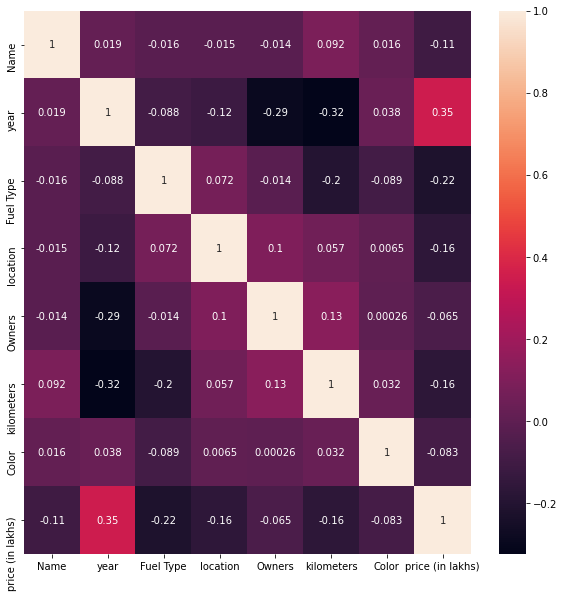

In [54]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

From the heatmap,
1. Year of the car is highly contributing the predicting the price of the column.
2. Kilometers and price are inversely propotional to each other.
3. number of owners and year are inversely proptional to each other.

# Skewness ad Outliers

In [55]:
df.skew()  # checking skewness and outliers

Name               -0.114139
year               -1.024089
Fuel Type           0.492045
location            0.235189
Owners              1.542888
kilometers          8.511343
Color              -0.511868
price (in lakhs)    3.058346
dtype: float64

We can see that the skewness is there in the dataset. This is because of the outliers, we will not be removing the outliers as we may end up losing the important information. We be removing the skewness form data using power transformation method like yeo-johnnson methods.

# Dividing the dataset into X and Y 

In [56]:
x=df.iloc[:,:-1]   #Independent dataset
x

Name  year  Fuel Type  location  Owners  kilometers  Color
0        1  2016          2         8       1       65000    141
1       25  2015          2         8       3       80000     11
2       11  2015          9         7       1       77456    118
3       28  2018          9         8       1       19000     60
4        1  2011          2        17       1      116000    118
...    ...   ...        ...       ...     ...         ...    ...
5137    11  2010         15        22       0       86000     25
5138     7  2010         15        22       3       65000     42
5139    35  2019         15        22       1       16000    132
5140    11  2019         15        22       1       21000    141
5141    23  2021         15        22       1        4000     86

[5079 rows x 7 columns]

In [57]:
y=df['price (in lakhs)']   #Dependent Dataset
y

0       22.99
1       32.99
2        4.50
3        1.21
4        9.75
        ...  
5137     1.90
5138     2.20
5139     6.50
5140     7.10
5141     9.70
Name: price (in lakhs), Length: 5079, dtype: float64

# VIF Factor

In [58]:
def cal_vif(x):    # calculating variance Inflation Factor
    vif=pd.DataFrame()
    vif["variables"]=x.columns
    vif["VIF FACTOR"]=[variance_inflation_factor(x.values,i) for i in range (x.shape[1])]
    return(vif)

In [59]:
cal_vif(x)

variables  VIF FACTOR
0        Name    4.419715
1        year   16.075897
2   Fuel Type    3.120581
3    location    3.898013
4      Owners    3.730559
5  kilometers    2.657026
6       Color    4.488875

We will be performing the variance inflation factor to check the multi colinearities in the columns. As we could see that there are no multicolinearities we will not remove any column.

In [60]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')  #to remove skewness
x

array([[-1.84463563,  0.34045745, -0.88832901, ..., -0.45867376,
         0.31452933,  0.96355034],
       [ 0.64676919,  0.03733099, -0.88832901, ...,  1.7052957 ,
         0.65637956, -1.63469582],
       [-0.70591858,  0.03733099,  1.03154167, ..., -0.45867376,
         0.60150056,  0.50161282],
       ...,
       [ 1.54134134,  1.29235316,  1.64411436, ..., -0.45867376,
        -1.43617457,  0.78272346],
       [-0.70591858,  1.29235316,  1.64411436, ..., -0.45867376,
        -1.1611746 ,  0.96355034],
       [ 0.46209844,  1.96399602,  1.64411436, ..., -0.45867376,
        -2.4900037 , -0.13998792]])

In [61]:
from sklearn.preprocessing import StandardScaler
mn=StandardScaler()  #performing standard scaling to bring them on the same scale.
x=mn.fit_transform(x)
x

array([[-1.84463563,  0.34045745, -0.88832901, ..., -0.45867376,
         0.31452933,  0.96355034],
       [ 0.64676919,  0.03733099, -0.88832901, ...,  1.7052957 ,
         0.65637956, -1.63469582],
       [-0.70591858,  0.03733099,  1.03154167, ..., -0.45867376,
         0.60150056,  0.50161282],
       ...,
       [ 1.54134134,  1.29235316,  1.64411436, ..., -0.45867376,
        -1.43617457,  0.78272346],
       [-0.70591858,  1.29235316,  1.64411436, ..., -0.45867376,
        -1.1611746 ,  0.96355034],
       [ 0.46209844,  1.96399602,  1.64411436, ..., -0.45867376,
        -2.4900037 , -0.13998792]])

# Performing Algorithms

In [62]:
minmse=0    #finding the best Random State
maxrs=0
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    err=mean_squared_error(y_test,pred)
    if err>minmse:
        minmse=err
        maxrs=i
print("MSE is ",round(minmse,2),"at random state",maxrs)

MSE is  170.5 at random state 76


In [63]:
x_train1,x_test1,y_train1,y_test1=train_test_split(x,y,test_size=.30,random_state=76)

# Linear Regressor

In [64]:
lr=LinearRegression()
lr.fit(x_train1,y_train1)
print("Cofficient is:",lr.coef_)
print("Intercept is: ",lr.intercept_)
sco=lr.score(x_train1,y_train1)
sco1=sco*100
print("Score is: ",sco1)
pred=lr.predict(x_test1)
mse=mean_squared_error(y_test1,pred)
print("Mean Squared Error is: ",round(mse,2))
abse=mean_absolute_error(y_test1,pred)
print("Mean Absolute Error is: ",round(abse,2))
scr=r2_score(y_test1,pred)
print("R2 Score is: ",round(scr,2))
print("rsme",np.sqrt(mse))

Cofficient is: [-1.51778415  3.28270359 -3.38035227 -0.95189798  0.50230208 -2.57251876
 -1.05695472]
Intercept is:  10.608613864260224
Score is:  23.138792845230917
Mean Squared Error is:  170.5
Mean Absolute Error is:  7.71
R2 Score is:  0.21
rsme 13.057423256616769


# Decision Tree Regressor

In [65]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train1,y_train1)
sw1=dtr.score(x_train1,y_train1)
#print("Coffecient is: ",dtr.coef_)
#print("Intercept is: ",dtr.intercept_)
print("Score is: ",sw1)
pred=dtr.predict(x_test1)
print("Mean Squared Error is:",round(mean_squared_error(y_test1,pred),2))
print("Mean Absolute Error is:",round(mean_absolute_error(y_test1,pred),2))
print("R2 Score is:",round(r2_score(y_test1,pred),2))
print("RSME",np.sqrt(mean_squared_error(y_test1,pred)))

Score is:  0.9995862430069647
Mean Squared Error is: 110.42
Mean Absolute Error is: 3.72
R2 Score is: 0.49
RSME 10.507912539456258


# Support Vector Regressor

In [66]:
svr1=SVR(kernel="linear")
svr1.fit(x_train1,y_train1)
sw2=svr1.score(x_train1,y_train1)
print("Coffecient is: ",svr1.coef_)
print("Intercept is: ",svr1.intercept_)
print("Score is: ",sw2)
pred=svr1.predict(x_test1)
print("Mean Squared Error is:",round(mean_squared_error(y_test1,pred),2))
print("Mean Absolute Error is:",round(mean_absolute_error(y_test1,pred),2))
print("R2 Score is:",round(r2_score(y_test1,pred),2))
print("RSME",np.sqrt(mean_squared_error(y_test1,pred)))

Coffecient is:  [[-0.99634169  1.83871087 -1.76296729 -0.53219034  0.12573479 -0.38505478
  -0.54112719]]
Intercept is:  [6.71528858]
Score is:  0.06933692792220669
Mean Squared Error is: 203.05
Mean Absolute Error is: 6.55
R2 Score is: 0.05
RSME 14.24958482710596


# K Neighbors Regressor

In [67]:
knr=KNeighborsRegressor()
knr.fit(x_train1,y_train1)
sw2=knr.score(x_train1,y_train1)
#print("Coffecient is: ",knr.coef_)
#print("Intercept is: ",knr.intercept_)
print("Score is: ",sw2)
pred=knr.predict(x_test1)
print("Mean Squared Error is:",round(mean_squared_error(y_test1,pred),2))
print("Mean Absolute Error is:",round(mean_absolute_error(y_test1,pred),2))
print("R2 Score is:",round(r2_score(y_test1,pred),2))
print("RSME",np.sqrt(mean_squared_error(y_test1,pred)))

Score is:  0.5850547710986128
Mean Squared Error is: 134.3
Mean Absolute Error is: 5.75
R2 Score is: 0.37
RSME 11.58872231628166


# Random Forest Regressor

In [68]:
rfr=RandomForestRegressor()
rfr.fit(x_train1,y_train1)
sw1=rfr.score(x_train1,y_train1)
#print("Coffecient is: ",dtr.coef_)
#print("Intercept is: ",dtr.intercept_)
print("Score is: ",sw1)
pred=rfr.predict(x_test1)
print("Mean Squared Error is:",round(mean_squared_error(y_test1,pred),2))
print("Mean Absolute Error is:",round(mean_absolute_error(y_test1,pred),2))
print("R2 Score is:",round(r2_score(y_test1,pred),2))
print("RSME",np.sqrt(mean_squared_error(y_test1,pred)))

Score is:  0.9610123569575308
Mean Squared Error is: 67.56
Mean Absolute Error is: 3.33
R2 Score is: 0.69
RSME 8.219209428715924


# Cross Validation Score

In [69]:
def rmse_cv(model,x_train1,y_train1):
    mse_cv_score=-cross_val_score(model,x_train1,y_train1,cv=5,scoring="neg_mean_squared_error",n_jobs=-1)
    rmse_cv=np.sqrt(mse_cv_score).mean()
    return(rmse_cv)

In [70]:
rmse_cv(lr,x_train1,y_train1)

11.289262313701794

In [71]:
rmse_cv(rfr,x_train1,y_train1)

7.224616914444892

In [72]:
rmse_cv(dtr,x_train1,y_train1)

9.72906401637626

In [73]:
rmse_cv(knr,x_train1,y_train1)

10.337811721792349

In [74]:
rmse_cv(svr1,x_train1,y_train1)

12.409631914372127

We have performed the various algorithms and cross validated the results for the root mean squared error and we could see the best results were given by random forest regressor. So will be perfroming the hyper parameter tunning for the same.

# Hyper Parameter Tunning

In [75]:
parameter={"criterion":["squared_error","absolute_error","poisson"],
          "bootstrap":[True,False],
          "oob_score":[True,False],
          "max_depth":np.arange(2,20),
          "max_features":['auto','sqrt','log2']}

In [76]:
gcv=GridSearchCV(RandomForestRegressor(),parameter,cv=5)
gcv.fit(x_train1,y_train1)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['squared_error', 'absolute_error',
                                       'poisson'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'oob_score': [True, False]})

In [77]:
gcv.best_params_  #best parameters

{'bootstrap': False,
 'criterion': 'poisson',
 'max_depth': 19,
 'max_features': 'log2',
 'oob_score': False}

# Final Model

In [78]:
rfr=RandomForestRegressor(max_features='log2', bootstrap=False, oob_score=False, max_depth=19)
rfr.fit(x_train1,y_train1)
sw1=rfr.score(x_train1,y_train1)
#print("Coffecient is: ",dtr.coef_)
#print("Intercept is: ",dtr.intercept_)
print("Score is: ",sw1)
pred=rfr.predict(x_test1)
print("Mean Squared Error is:",round(mean_squared_error(y_test1,pred),2))
print("Mean Absolute Error is:",round(mean_absolute_error(y_test1,pred),2))
print("R2 Score is:",round(r2_score(y_test1,pred),2))
print("RSME",np.sqrt(mean_squared_error(y_test1,pred)))

Score is:  0.9994896343196867
Mean Squared Error is: 72.29
Mean Absolute Error is: 3.42
R2 Score is: 0.66
RSME 8.50215799699224


# Saving the Model

In [79]:
import joblib
joblib.dump(rfr,"usedcarpredict.pkl")

['usedcarpredict.pkl']